# Carga y análisis de los datos de los supervivientes del dataset The last of us Survival

En primer lugar importaremos las librerías necesarias. En este caso haremos uso de **pandas**, **numpy**, **matplotlib** y **seaborn**. Estos dos últimos nos permitirá visualizar datos de forma gráfica

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Establecemos unas configuraciones para los gráficos
plt.rcParams['font.size'] = 12
# Mostrar todas las columnas de un DataFrame (sin ocultarlas)
pd.set_option('display.max_columns', None)
# Ancho de la pantalla para mostrar todo sin truncar
pd.set_option('display.width', None)
# Mostramos las versiones de las librerías importadas
print("Entorno:")
print(f"- pandas: {pd.__version__}")
print(f"- matplotlib: {plt.matplotlib.__version__}")
print(f"- seaborn: {sns.__version__}")
print(f"- numpy: {np.__version__}")

Entorno:
- pandas: 2.3.3
- matplotlib: 3.10.8
- seaborn: 0.13.2
- numpy: 2.2.6


Una vez importado lo necesario, pasaremos a cargar los datos del csv "the_last_of_us_survival_dataset.csv" y lo cargaremos en un dataframe de pandas

In [2]:
tlou_df = pd.read_csv("data/the_last_of_us_survival_dataset.csv")

# Vemos la información del dataset, con todas sus columnas y tipo de datos
print("Columnas y tipo de datos: ")
tlou_df.info()

print("Veamos las cinco primeras filas del dataframe")
tlou_df.head()

Columnas y tipo de datos: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Edad                   250 non-null    int64 
 1   Genero                 250 non-null    object
 2   Faccion                250 non-null    object
 3   ExperienciaCombate     250 non-null    int64 
 4   HabilidadSigilo        250 non-null    int64 
 5   Salud                  250 non-null    int64 
 6   ArmaFuego              250 non-null    object
 7   ArmaCuerpoCuerpo       250 non-null    object
 8   ItemCreable            250 non-null    object
 9   NivelInfeccionZona     250 non-null    int64 
 10  CondicionesClimaticas  250 non-null    object
 11  NivelEstrés            250 non-null    int64 
 12  TieneCompañero         250 non-null    int64 
 13  Superviviente          250 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 27.5+ KB
V

,Edad,Genero,Faccion,ExperienciaCombate,HabilidadSigilo,Salud,ArmaFuego,ArmaCuerpoCuerpo,ItemCreable,NivelInfeccionZona,CondicionesClimaticas,NivelEstrés,TieneCompañero,Superviviente
0,58,Masculino,Militar,9,3,74,Bow,Lead Pipe,Health Kit,4,Seco,5,0,1
1,16,Femenino,Civil,9,2,82,El Diablo,Ninguna,Molotov Cocktail,10,Lluvioso,8,0,0
2,33,Femenino,Civil,4,5,66,Shorty,Ninguna,Health Kit,4,Lluvioso,10,0,0
3,33,Femenino,Civil,3,6,98,Shotgun,Lead Pipe,Health Kit,8,Seco,1,1,0
4,57,Masculino,Militar,2,5,52,Revolver,Hatchet,Shiv,10,Seco,0,0,0


### ¿Qué significan las columnas?

| Columna | Descripción |
|---------|-------------|
| Edad | La edad de la persona |
| Genero | Género de la persona |
| Facción | Facción a la que pertenece la persona (Militar, Civil, Bombero...) |
| ExperienciaCombate | Experiencia que tiene la persona en el combate (1 muy poco, 10 mucho) |
| HabilidadSigilo | Habilidad que tiene la persona en el sigilo, ya sea para hacer misiones en silencio... (1 muy poco, 10 mucho) |
| Salud | Como está de salud la persona |
| ArmaFuego | El arma de fuego que dispone la persona |
| ArmaCuerpoCuerpo | Arma cuerpo a cuerpo que dispone la persona |
| ItemCreable | El objeto que es capaz de crear la persona |
| NivelInfeccionZona | Representa la intensidad del peligro ambiental |
| CondicionesClimaticas | Las condiciones climáticas donde se encuentra la persona |
| NivelEstrés | El nivel de estres que tiene la persona (0 nada, 10 mucho) |
| TieneCompañero | Determina si la persona tiene un compañero |
| Superviviente | Indica si la persona está viva o no |


La supervivencia de cada persona se determina mediante una puntuación ponderada considerando:

- Salud, sigilo, experiencia de combate y niveles de estrés.
- Tipo de armas y peligro ambiental.
- Nivel de infección ajustado por ubicación, seguridad e inmunidad.

Comprobemos ahora si el dataset tiene valores faltantes

In [ ]:
valores_faltantes = tlou_df.isnull().sum()

print("Veamos los valores faltantes: ")
print(valores_faltantes)
# En este caso vemos que no tiene valores faltantes, en caso de que los tuviera, tendríamos que manejarlo, ya sea sustituyéndolo por la mediana o la moda (valor más habitual)

El dataframe tiene Edad                     0
Genero                   0
Faccion                  0
ExperienciaCombate       0
HabilidadSigilo          0
Salud                    0
ArmaFuego                0
ArmaCuerpoCuerpo         0
ItemCreable              0
NivelInfeccionZona       0
CondicionesClimaticas    0
NivelEstrés              0
TieneCompañero           0
Superviviente            0
dtype: int64 valores faltantes


Ahora vamos a ver si hay algún valor duplicado en el dataset

In [6]:
filas_duplicadas = tlou_df.duplicated().sum()

print(f"Filas duplicadas: {filas_duplicadas}")

if filas_duplicadas==0:
    print("En este caso no hay filas duplicadas")
else:
    print("Estas son las filas duplicadas")
    display(tlou_df[tlou_df.duplicated(keep=False)])

Filas duplicadas: 0
En este caso no hay filas duplicadas


En este caso vemos que el dataset está limpio, por lo que no hay que hacer ninguna limpieza, aunque no es lo habitual. En caso de haber suplicados, se borraría los duplicados, quedándonos con uno solo, y los valores faltantes, como no hay demasiados datos, no podemos borrar las filas donde falten valores, por lo que lo sustituiríamos por la mediana o la moda

# Exploración visual de los datos

A continuación, vamos a hacer una exploración visual de los datos, viendo correlaciones entre ellas

En primer lugar haremos un gráfico de barras para ver las facciones de las diferentes personas y ver cuanto hay más o menos en cada una de ellas de manera visual

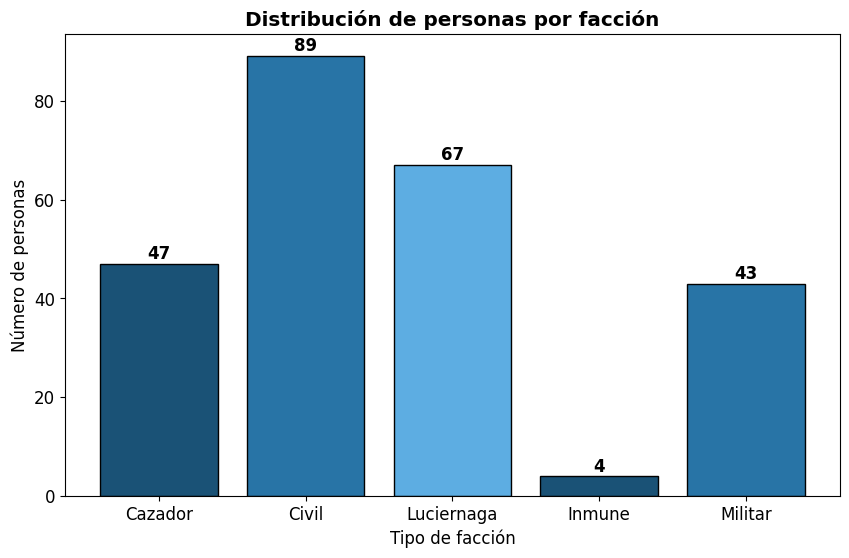

In [28]:
persona_por_faccion = tlou_df['Faccion'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
colores = ['#1a5276', '#2874a6', '#5dade2']  # Azules de diferente intensidad
etiquetas = ['Cazador', 'Civil', 'Luciernaga', 'Inmune', 'Militar']

# plt.bar() crea el gráfico de barras
# etiquetas = nombres en el eje X
# persona_por_faccion.values = altura de cada barra
# color = lista de colores
# edgecolor='black' = bordes negros alrededor de las barras
barras = plt.bar(etiquetas, persona_por_faccion.values, color=colores, edgecolor='black')

for barra, valor in zip(barras, persona_por_faccion.values):
    altura_barra = barra.get_height()  # Altura de la barra
    x_centro = barra.get_x() + barra.get_width()/2  # Centro horizontal
    plt.text(x_centro, altura_barra+1, f'{valor}', ha='center', fontsize=12, fontweight='bold')

# Etiquetas y título
plt.xlabel('Tipo de facción')
plt.ylabel('Número de personas')
plt.title('Distribución de personas por facción', fontweight='bold')

plt.show()

Una vez vista la distribución, veamos la media de supervivencia según el tipo de facción

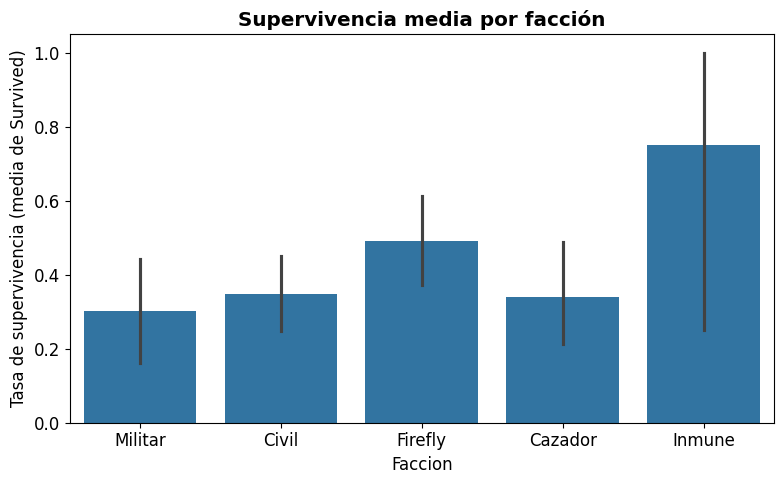

In [5]:
plt.figure(figsize=(8, 5))

# sns.barplot() crea un gráfico de barras que CALCULA ESTADÍSTICAS
# Específicamente:
# - tlou_df: El dataset 
# - x='NivelInfeccionZona': variable en el eje X (male/female)
# - y='Superviviente': variable en el eje Y
# - estimator=np.mean: calcular el PROMEDIO de superviviente para cada nivel de infección de zona
#   (0 = no sobrevivió, 1 = sobrevivió, así que promedio = % de supervivencia)
sns.barplot(data=tlou_df, x='Faccion', y='Superviviente', estimator=np.mean)

plt.ylabel('Tasa de supervivencia (media de Survived)')
plt.title('Supervivencia media por facción', fontweight='bold')
plt.tight_layout()
plt.show()

Vemos que los que más sobreviven son los que son inmunes (ya que no se pueden infectar), y luego le siguen los luciernagas.

Veamos ahora la supervivencia por tipo de infección de zona (siendo 0 sin nivel de infección, y 10 mucha infección)

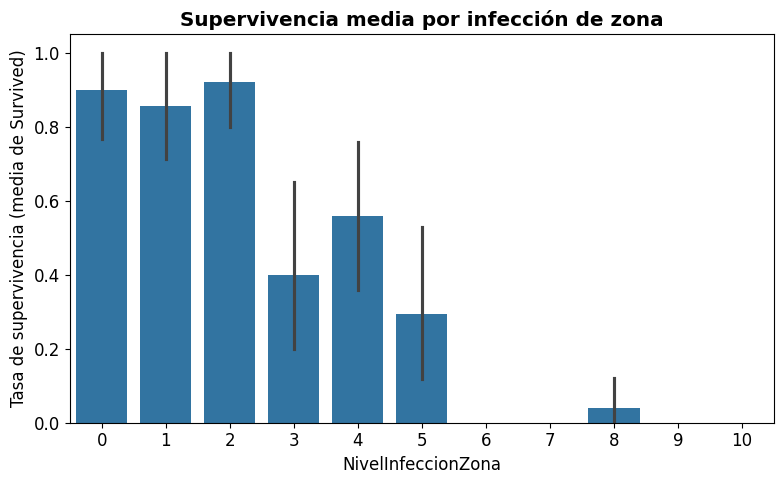

In [17]:
plt.figure(figsize=(8, 5))

# sns.barplot() crea un gráfico de barras que CALCULA ESTADÍSTICAS
# Específicamente:
# - tlou_df: El dataset 
# - x='NivelInfeccionZona': variable en el eje X (male/female)
# - y='Superviviente': variable en el eje Y
# - estimator=np.mean: calcular el PROMEDIO de superviviente para cada nivel de infección de zona
#   (0 = no sobrevivió, 1 = sobrevivió, así que promedio = % de supervivencia)
sns.barplot(data=tlou_df, x='NivelInfeccionZona', y='Superviviente', estimator=np.mean)

plt.ylabel('Tasa de supervivencia (media de Survived)')
plt.title('Supervivencia media por infección de zona', fontweight='bold')
plt.tight_layout()
plt.show()

Vemos que, como es normal, en los niveles de infección menores sobreviven más gente, aunque podemos ver que en las zonas de nivel 5 y 8 han sobrevido algunas personas

Por otro lado, vamos a ver la tasa promedio de supervivencia según el nivel de combate

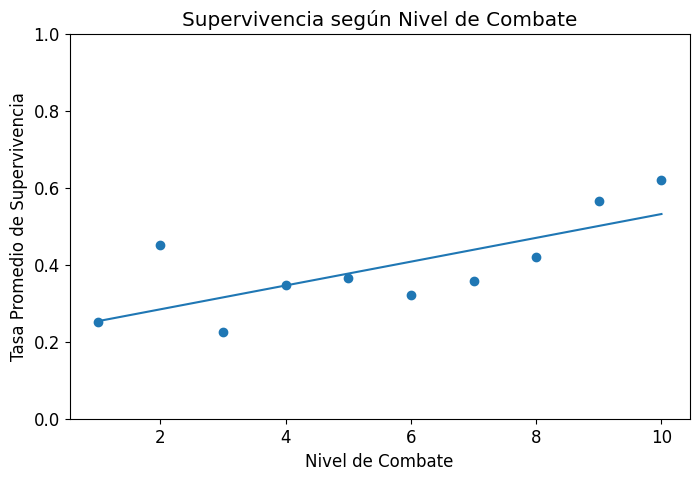

In [6]:
survival_rate = tlou_df.groupby("ExperienciaCombate")["Superviviente"].mean()

# Scatter
plt.figure(figsize=(8,5))
plt.scatter(survival_rate.index, survival_rate.values)

# Línea de tendencia
z = np.polyfit(survival_rate.index, survival_rate.values, 1)
p = np.poly1d(z)
plt.plot(survival_rate.index, p(survival_rate.index))

plt.xlabel("Nivel de Combate")
plt.ylabel("Tasa Promedio de Supervivencia")
plt.title("Supervivencia según Nivel de Combate")
plt.ylim(0,1)
plt.show()

Podemos observar una tendencia en el que cuanto mayor sea el nivel de combate (salvo excepciones como el nivel 2 con 3, y 5 con el 6 y 7) mayor es la tasa promedio de supervivencia

Por último vamos a ver las correlaciones que hay entre las distintas columnas del dataset

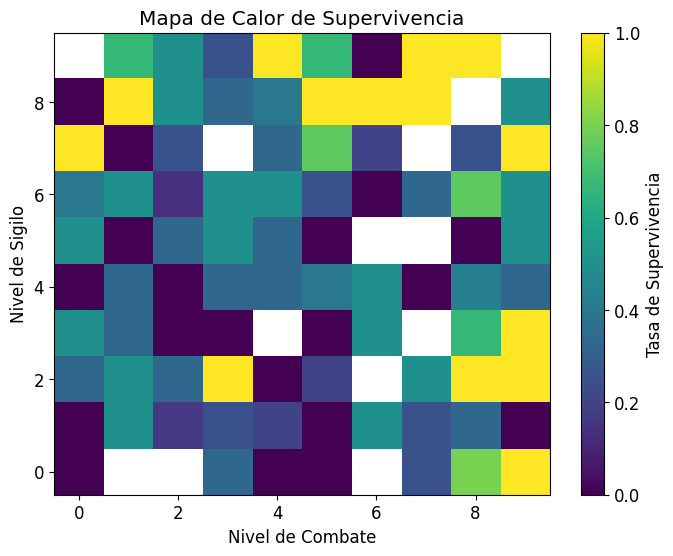

In [7]:
pivot = tlou_df.pivot_table(
    values="Superviviente",
    index="HabilidadSigilo",
    columns="ExperienciaCombate",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
plt.imshow(pivot, cmap="viridis", origin="lower", aspect="auto")
plt.colorbar(label="Tasa de Supervivencia")
plt.xlabel("Nivel de Combate")
plt.ylabel("Nivel de Sigilo")
plt.title("Mapa de Calor de Supervivencia")
plt.show()

En esta otra gráfica, podemos ver una comparación con el nivel de combate, el nivel de sigilo y la tasa de supervivencia. Podemos ver que hay una correlación positiva entre ellas, cuanto mayor nivel de sigilo y mayor nivel de combate, la tasa de promedio de supervivencia tiende a subir, por lo que podemos cocluir que el equilibrio entre agresividad y discreción es clave en entornos hostiles.

Por último vamos a ver las correlaciones que hay entre las distintas columnas del dataset

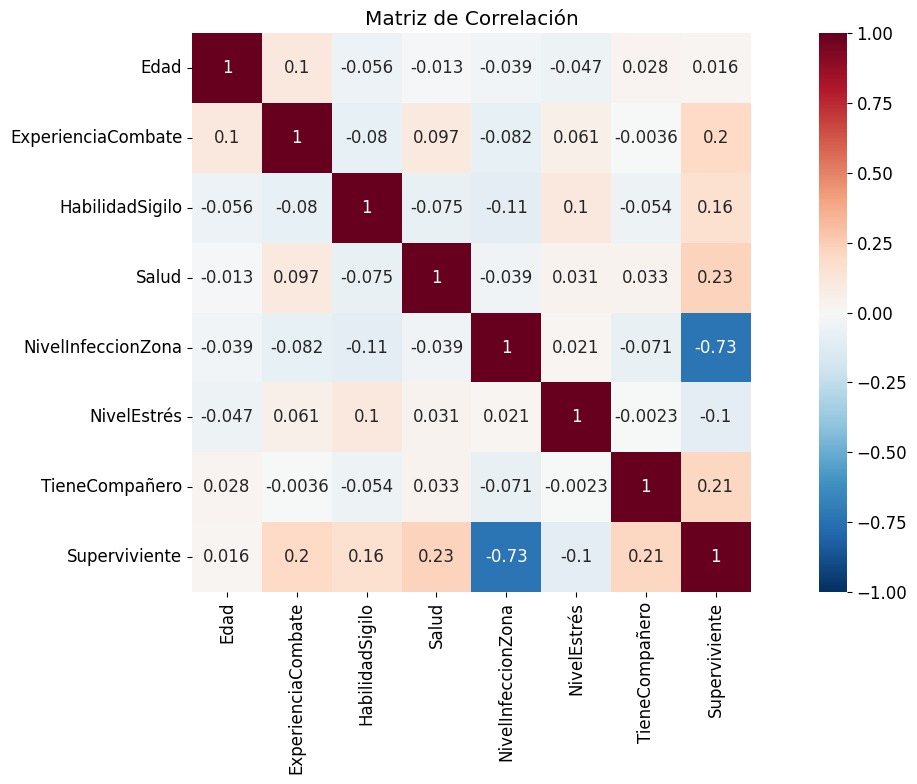

In [26]:
# Para ello, deberemos de calcular las correlaciones, haciendo uso del método .corr()
tlou_df_numericas = tlou_df.select_dtypes(include=['number'])
correlaciones = tlou_df_numericas.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlaciones, 
    annot=True,
    cmap='RdBu_r',
    center=0,
    vmin=-1, vmax=1,
    square=True)

plt.title('Matriz de Correlación')
plt.tight_layout()  # Ajustar márgenes
plt.show()

Vemos que, de las variables númericas, podemos ver las correlaciones que hay entre ellas. Podemos sacar algunas conclusiones, como que la infección de la zona y si ha sobrevivido o no es cerca de -1, es decir, hay una relación negativa, por lo que cuando una sube, otra baja (cuando hay una infección baja, mayor probabilidad hay de que sobreviva). Además, vemos otra cosa curiosa y es que hay un 0.21 de que cuando alguien tiene compañero, esa persona sobreviva, no está tan cerca de 1, pero mayor probabilidad hay de que si tienes un compañero seas superviviente. lo mismo ocurre con la salud y la supervivencia y la experiencia en el combate con sobrevivir.

A continuación, en otro archivo, entrenaremos un modelo de machine learning para poder predecir si una persona va a sobrevivir o no